# BDT - Background and Signal distribution

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import pandas as pd

signal = pd.read_csv('.//data//500.csv', index_col=0)
background = pd.read_csv('.//data//background.csv', index_col=0)

signal.drop(["nTags", "MCChannelNumber", "mVHres"], axis=1, inplace=True)
background.drop(["nTags", "MCChannelNumber", "mVHres"], axis=1, inplace=True)

In [45]:
train_bkg, test_bkg = train_test_split(background, test_size=0.4, random_state=2) #splitting bkg into train and test
train_signal, test_signal = train_test_split(signal, test_size=0.4, random_state=2) #splitting signal into train and test

train_y = len(train_bkg) * [0] + len(train_signal) * [1] #training set
test_y = len(test_bkg) * [0] + len(test_signal) * [1] #test set

train_x = pd.concat([train_bkg, train_signal], ignore_index=True) #training data
test_x = pd.concat([test_bkg, test_signal], ignore_index=True) #testing data

train_x.drop(["weight"], axis=1, inplace=True)
test_x.drop(["weight"], axis=1, inplace=True)

print("Data has been split into test and train samples")
print("\tN(train) = ", len(train_x))
print("\tN(test)  = ", len(test_x))


Data has been split into test and train samples
	N(train) =  376022
	N(test)  =  250682


In [46]:
#Variables to test: max_depth, n_estimators and learning rate

print("\033[1mFit the decision tree\033[0m")
BDT_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), algorithm="SAMME", 
                             n_estimators=100, learning_rate=2).fit(train_x, train_y)

print("... now compute the decision tree score")
train_score = BDT_clf.score(train_x, train_y)
test_score  = BDT_clf.score(test_x, test_y)

print("\nDecision Tree Classifier Score is:")
print("\tTrain Score = ", train_score, " (This measure of performance is biased)")
print("\tTest Score  = {:5.4f}".format(test_score))
print("\tNumber of mis-classified test data = {:2.1f}".format((1-test_score)*len(test_x)))

Fit the decision tree
... now compute the decision tree score

Decision Tree Classifier Score is:
	Train Score =  0.776010446197297  (This measure of performance is biased)
	Test Score  = 0.7768
	Number of mis-classified test data = 55964.0


In [47]:
Decision_Function = BDT_clf.decision_function(test_x)
print('Output of Decision Function is:', Decision_Function) 

Output of Decision Function is: [-0.0168638   0.00226843 -0.03692952 ...  0.00226843  0.00226843
  0.00226843]


(array([     0.,      0.,      0.,      0., 193220.,  57462.,      0.,
             0.,      0.,      0.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

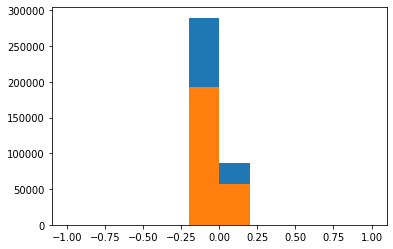

In [48]:
pred_train = BDT_clf.decision_function(train_x)
pred_test = BDT_clf.decision_function(test_x)

c_max = 1
c_min = -1

plt.figure()
plt.hist(pred_train,bins=10,range=(c_min,c_max))
plt.hist(pred_test,bins=10,range=(c_min,c_max))